In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
df = pd.read_csv("./data.csv")

# Фильтруем нужные поля
fields = [
    'neighbourhood_group',
    'neighbourhood',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]
df = df.loc[:, fields]


# Находим уникальные значения neighbourhood, room_type, 
neighbourhoods = df['neighbourhood'].unique()
neighbourhood_groups = df['neighbourhood_group'].unique()
room_types = df['room_type'].unique()

# Фильтруем данные для гистограмм
hist_data_price = df.loc[:, ['neighbourhood_group', 'neighbourhood', 'room_type', 'price']]
hist_data_availability = df.loc[:, ['neighbourhood_group', 'neighbourhood', 'room_type', 'availability_365']]

hist_data_price_groupped = hist_data_price.groupby(['neighbourhood_group', 'room_type']).mean('price')
hist_data_availability_groupped = hist_data_availability.groupby(['neighbourhood_group', 'room_type']).mean('availability')


<Axes: xlabel='room_type', ylabel='price'>

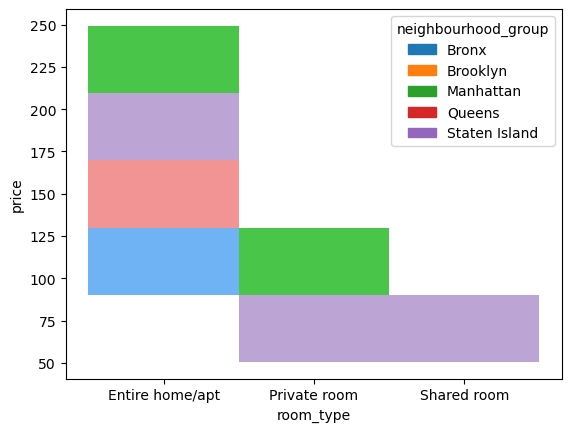

In [4]:
# Средняя цена в зависимости от типа жилья и района 
sb.histplot(hist_data_price_groupped, x = 'room_type', y = 'price', hue = 'neighbourhood_group')

<Axes: xlabel='room_type', ylabel='availability_365'>

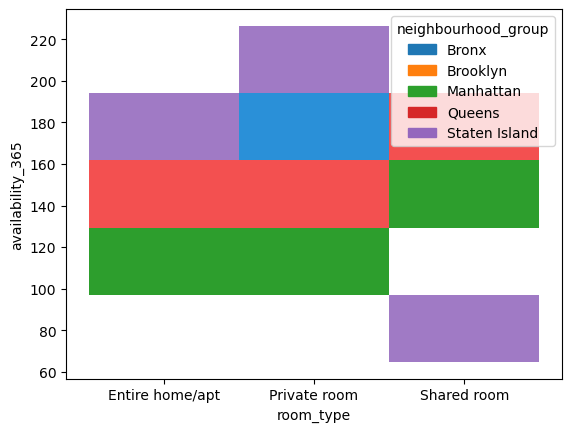

In [5]:
# Средняя достуаность в зависимости от типа жилья и района 
sb.histplot(hist_data_availability_groupped, x = 'room_type', y = 'availability_365', hue = 'neighbourhood_group')

In [6]:
def filter_by_room_type(df_to_filter, room_type):
    return df_to_filter.loc[df_to_filter['room_type'] == room_type]

In [7]:
room_type = room_types[0]
hist_data_price_room_type = filter_by_room_type(hist_data_price, room_type)
print(room_type)
print(hist_data_price_room_type)
#hist_data_availability_room_type = filter_by_room_type(hist_data_availability, room_type)

Private room
      neighbourhood_group       neighbourhood     room_type  price
0                Brooklyn          Kensington  Private room    149
2               Manhattan              Harlem  Private room    150
6                Brooklyn  Bedford-Stuyvesant  Private room     60
7               Manhattan      Hell's Kitchen  Private room     79
8               Manhattan     Upper West Side  Private room     79
...                   ...                 ...           ...    ...
48888           Manhattan      Hell's Kitchen  Private room    125
48889              Queens             Jamaica  Private room     65
48890            Brooklyn  Bedford-Stuyvesant  Private room     70
48891            Brooklyn            Bushwick  Private room     40
48894           Manhattan      Hell's Kitchen  Private room     90

[22326 rows x 4 columns]


In [8]:
# Мат ожидания цен, медианы и стандартные отклонения, в зависимости от района
def filter_by_neighbourhood_group(df_to_filter, neighbourhood_group):
    return df_to_filter.loc[df_to_filter['neighbourhood_group'] == neighbourhood_group]

#Пишем в мапу, чтобы в дальнейшем использовать
mean_price_by_neighbourhood_group = {}

for neighbourhood_group in neighbourhood_groups:
    prices = filter_by_neighbourhood_group(hist_data_price, neighbourhood_group)
    prices = prices.loc[:, 'price']
    mean = prices.mean()
    std = prices.std()
    median = prices.median()
    mean_price_by_neighbourhood_group[neighbourhood_group] = mean
    print (neighbourhood_group, " prices: ")
    print ("Mean: ", mean)
    print ("Std: ", std)
    print ("Median: ", median, "\n\n\n")
    
    


Brooklyn  prices: 
Mean:  124.38320732192598
Std:  186.8735378136611
Median:  90.0 



Manhattan  prices: 
Mean:  196.8758136743456
Std:  291.38318274158297
Median:  150.0 



Queens  prices: 
Mean:  99.51764913519237
Std:  167.10215506344343
Median:  75.0 



Staten Island  prices: 
Mean:  114.81233243967829
Std:  277.62040332462215
Median:  75.0 



Bronx  prices: 
Mean:  87.4967919340055
Std:  106.70934861314652
Median:  65.0 





In [9]:
# Мат ожидания цен, в зависимости от  микро-района. 
def filter_by_neighbourhood(df_to_filter, neighbourhood):
    return df_to_filter.loc[df_to_filter['neighbourhood'] == neighbourhood]

#Пишем в мапу, чтобы в дальнейшем использовать
mean_price_by_neighbourhood = {}

for neighbourhood in neighbourhoods:
    prices = filter_by_neighbourhood(hist_data_price, neighbourhood)
    prices = prices.loc[:, 'price']
    mean = prices.mean()
    mean_price_by_neighbourhood[neighbourhood] = mean
    

In [21]:
# Рассмотрим 3D-график зависимости цен от координат 
price_by_coordinates = df.loc[:, ['price', 'latitude', 'longitude', 'room_type']]

In [22]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

def draw_surf(data, room_type):
    price_by_coordinates_filtred = filter_by_room_type(data, room_type).loc[:, ['price', 'latitude', 'longitude']]



    fig = plot.figure()

    x = price_by_coordinates_filtred.loc[:, 'latitude'].values
    y = price_by_coordinates_filtred.loc[:, 'longitude'].values
    z = price_by_coordinates_filtred.loc[:, 'price'].values

    print("Room type: ", room_type)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0)
    fig.colorbar(surf)

    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(6))
    ax.zaxis.set_major_locator(MaxNLocator(5))

    fig.tight_layout()

    plt.show()

Room type:  Private room


<Figure size 640x480 with 0 Axes>

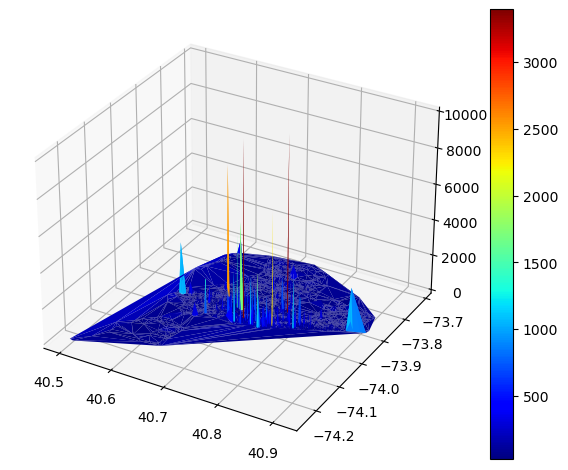

In [23]:
draw_surf(price_by_coordinates, room_types[0])

Room type:  Entire home/apt


<Figure size 640x480 with 0 Axes>

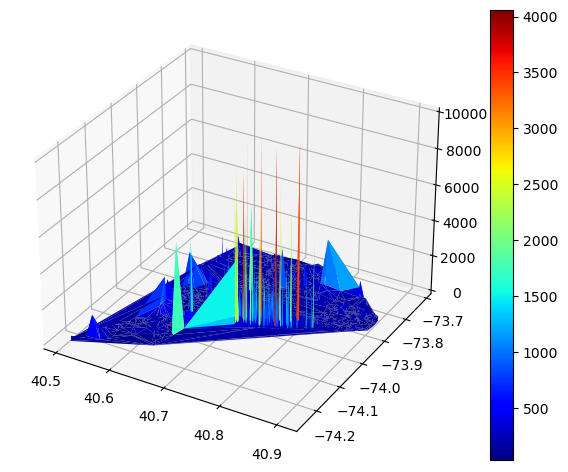

In [24]:
draw_surf(price_by_coordinates, room_types[1])

Room type:  Shared room


<Figure size 640x480 with 0 Axes>

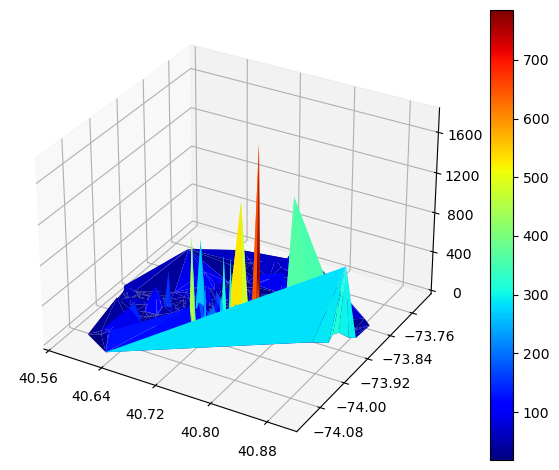

In [25]:
draw_surf(price_by_coordinates, room_types[2])

In [35]:
# Исходя из визуализации зависимости цены от координат, предполагаем, что есть некий центр, где квартиры дороже
# Находим данный максимум со всего датасета, и измеряем расстояния до него от всех локаций в датаесете

max_price_rec = df.loc[df['price'].idxmax(), ['latitude', 'longitude']]

In [34]:
# Функция для кодирования координат
# Вычисляется как 1 / (eps + dist(max_price_location, current_location))
# Где dist(max_price_location, current_location) - это расстояние от текущей локации до локации с наибольшей ценой
# eps - дополнительный параметр, чтобы избежать деления на 0, если текущая локация является локацией с наибольшей ценой
def transform_coordinates(lat, lon):
    latitude = max_price_rec['latitude']
    longitude = max_price_rec['longitude']
    eps = 0.000001
    point1 = np.array((lat, lon))
    point2 = np.array((latitude, longitude))
    dist = np.linalg.norm(point1 - point2)
    return 1 / (eps + dist)

#Тест 
#print(transform_coordinates(40.7681, -73.91651))
    

1000000.0


In [40]:
# Условный скоринг для параметра типа жилья Shared - 2, Private - 3, All apt - 5 (числа Фибоначчи)
# print(room_types)
def transform_room_type(room_type):
    if (room_type == 'Shared room'):
        return 2
    if (room_type == 'Private room'):
        return 3
    return 5

# Тест
# print(transform_room_type('Private room'))
# print(transform_room_type('Entire home/apt'))
# print(transform_room_type('Shared room'))

In [83]:
# Создаем мапы для трансормации названия района в среднюю цену по району

price_by_neighbourhood_group = df.loc[:, ['price', 'neighbourhood_group']].groupby(['neighbourhood_group']).mean().reset_index()
price_by_neighbourhood = df.loc[:, ['price', 'neighbourhood']].groupby(['neighbourhood']).mean().reset_index()
price_by_neighbourhood = price_by_neighbourhood.set_index('neighbourhood').to_dict()['price']
price_by_neighbourhood_group = price_by_neighbourhood_group.set_index('neighbourhood_group').to_dict()['price']

# Тест
# print(price_by_neighbourhood_group)
# print(price_by_neighbourhood)

def transform_neighbourhood_group(neighbourhood_group):
    return price_by_neighbourhood_group[neighbourhood_group]
#Тест
#print(transform_neighbourhood_group('Brooklyn'))

def transform_neighbourhood(neighbourhood):
    return price_by_neighbourhood_group[neighbourhood]
#Тест
#print(transform_neighbourhood_group('Brooklyn'))


124.38320732192598
